# Python for Data Science, Level I
### *Session \#8*
---

### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. APIs and JSON
---

### Warm Ups

**Imports:** 
```python
import requests
import pandas as pd
```

In [1]:
import requests
import pandas as pd

**GET Request:** 
```python
joke_url = "http://api.icndb.com/jokes/random"
requests.get(joke_url).json()
```

In [5]:
joke_url = "http://api.icndb.com/jokes/random"
data = requests.get(joke_url).json()

data['value']['joke']

"If you Google search &quot;Chuck Norris getting his ass kicked&quot; you will generate zero results. It just doesn't happen."

**GET Request with query string parameters**: 
```python
params = {"firstName": "Rob", "lastName": "Carrington"}
requests.get(joke_url, params=params).json()
```

**Fetching nested data:**
```python
data_dict = requests.get(joke_url).json()
data_dict['value']['joke']
```

## Exercises
---
**1. Do a basic GET request to the Kanye West quote API below, and fetch the quote from the response**

In [110]:
kanye_api = "https://api.kanye.rest"

**2. Call the [Dad Joke API](https://icanhazdadjoke.com/api) below, with the following headers:** 

```
"Accept": "application/json"
```

In [ ]:
dad_joke_api = "http://icanhazdadjoke.com"
headers = {"Accept": "application/json"}

requests.get(dad_joke_api, headers=headers).json()

**3. Call the stock market API below, with the following parameters:**
```
function: TIME_SERIES_DAILY
symbol: MSFT
apikey: 88WLCWEX74ZWRAOX
```

In [7]:
url = "https://www.quandl.com/api/v3/datasets/EOD/AAPL.csv"
query_string = "?api_key=K2km7t6m9xhmYRD7zCPY"
df = pd.read_csv(url+query_string, parse_dates=['Date'], index_col='Date')

### Extra Credit
---
**1. In addition to query string parameters, APIs can also vary their response by having different** "routes."
**Explore the Star Wars API below by adding routes like** `/people/1`, `/planets/4`, **or** `starships/9` **to the end.**

In [133]:
star_wars_api = "https://swapi.co/api/"

## II. Timeseries Data
---

### Warm Ups

**Sort based on index:** `df.sort_index(inplace=True)`

**Grab year/month/day of data with partial string index:** 
```python
df.loc['2017']
df.loc['2017-02']
df.loc['2017-02-01']
```

**Grab slice with partial string index:** `df['2017-01':'2017-03']`

**See summary statistics:** `df.describe()`

**Create a basic plot of two column:** 
```python
columns = ['Open', 'Close']
df[columns].plot()
```

In [25]:
# Turns on inline graphing
%matplotlib inline

# Add your code here

### Exercises
---
**1. Create a dataframe** `q1` **with just the stock data from January to April 2014**

In [ ]:
q1 = df.loc['2014-01':'2014-04']

**2. Create a line plot of the closing price during Q1**

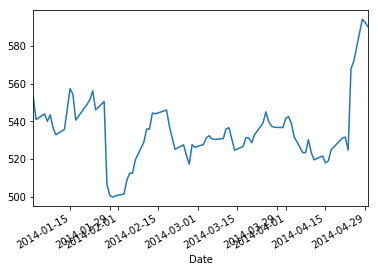

In [34]:
q1['Close'].plot()

**3. What was the averaging closing price of AAPL during Q1? How does that compare to its average price in 2015?**

In [39]:
df['Close'].mean()
df.loc['2015','Close'].mean()

120.03847222222223

**4. What was the lowest closing price of AAPL in 2015? What was the highest closing price?**

Hint: You can use the Numpy function `.idxmin()` to find the index of the min argument, and likewise for `.idxmax()`

In [11]:
df.loc['2015','Low'].idxmin()
df.loc['2015','High'].idxmax()

Timestamp('2015-04-28 00:00:00')

## I. Intro to Matplotlib

### Warm Ups

---

**Import pandas and matplotlib:**
```python
import pandas as pd
import matplotlib.pyplot as plt
```

**Set base style:** `plt.style.use('seaborn')`

*Note: This page lists [all base styles](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html) supported by Matplotlib.* 

**Create bar chart:**

```python
df.plot.bar()
```


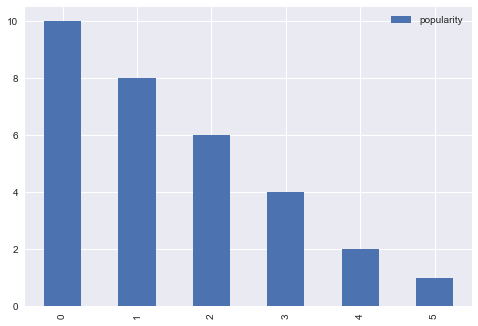

In [85]:
df = pd.DataFrame({"languages": ['Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp'], 
                   "popularity": [10, 8, 6, 4, 2, 1]})

# Add your code here
df.plot.bar()

**Set title of plot:**  `plt.title("Most popular languages")`

*Note: Can set* `fontsize` *and* `fontname` as parameters. *This page lists [all the fonts](http://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/) supported by Matplotlib*

**Set axis label:** `plt.xlabel("Languages")`

*Note: Can set* `fontsize` *and* `fontname`

**Modify axis ticks:** `plt.xticks(rotation=90)`

*Note: Can set* `fontsize` *and* `fontname`

### Exercises
---

**1. Create a dataframe from the file** `animal_lifespans.csv`

In [45]:
df = pd.read_csv("animal_lifespans.csv", encoding='latin-1')

**2. Drop rows with any nulls using** `.dropna(inplace=True)` **dataframe method.**

In [46]:
df.dropna(inplace=True)

**3. Group on the column** `TaxonClass` **and take the mean of** `Male MLE`, `Female MLE`, **and** `Overall MLE`. 

In [50]:
output = df.groupby("TaxonClass")['Male MLE', "Female MLE", "Overall MLE"].mean()
output

,Male MLE,Female MLE,Overall MLE
TaxonClass,,,
Aves,20.263636,18.900000,19.7
Mammalia,16.909524,17.114286,17.1
Reptilia,15.200000,17.900000,17.0


**4. Plot the result dataframe as a bar chart, with title.** 

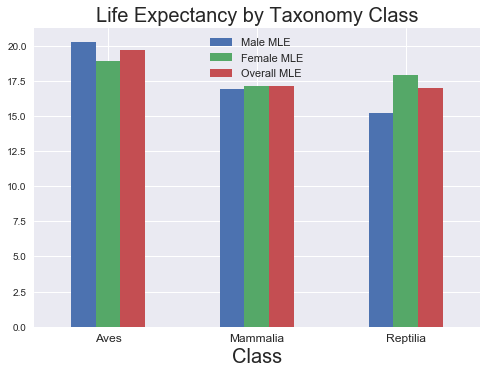

In [86]:
output.plot.bar()
plt.title("Life Expectancy by Taxonomy Class", fontsize=20)
plt.xticks(rotation=0, fontsize=12)
plt.xlabel("Class", fontsize=20)
plt.legend(fontsize=11)

**5. Label the x-axis as** `Class` **and the y-axis as** `Life Expectancy in Years`